In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


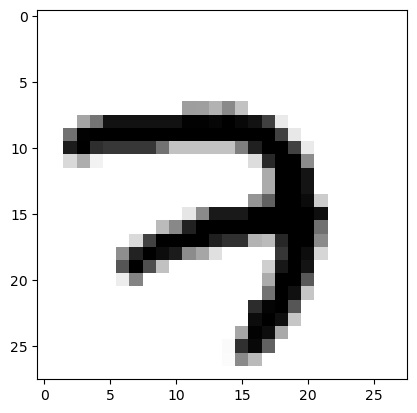

In [4]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

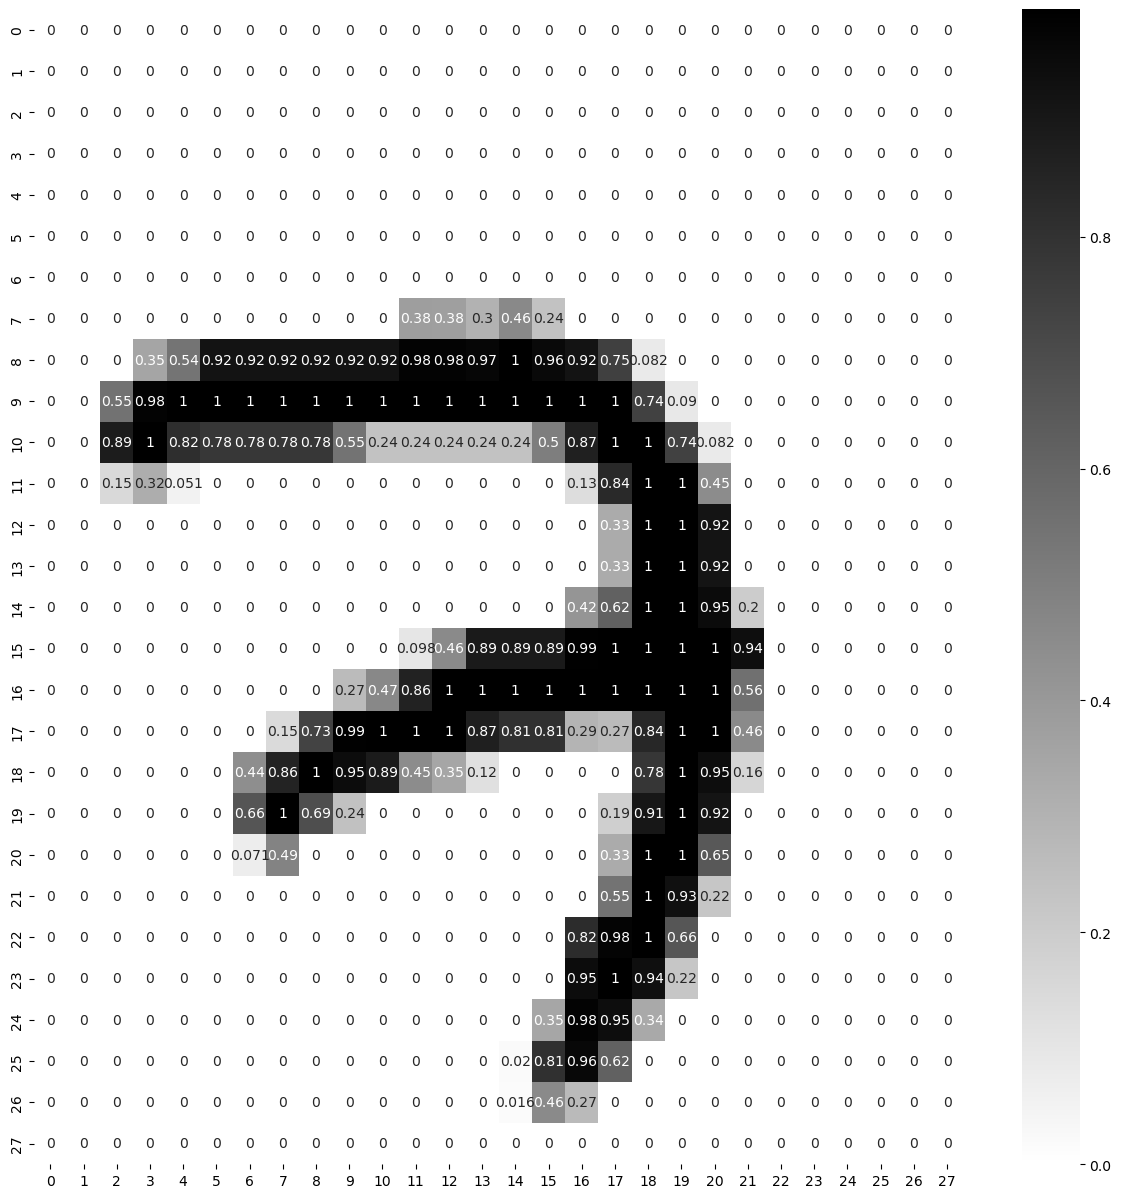

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [6]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [8]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 outputLayer (Dense)         (None, 10)                1

In [9]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [10]:
# training

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8985 - val_loss: 0.1613 - val_accuracy: 0.9576
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1647 - accuracy: 0.9525 - val_loss: 0.1240 - val_accuracy: 0.9656
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1211 - accuracy: 0.9642 - val_loss: 0.1068 - val_accuracy: 0.9692
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0970 - accuracy: 0.9710 - val_loss: 0.0951 - val_accuracy: 0.9712
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0791 - accuracy: 0.9773 - val_loss: 0.0896 - val_accuracy: 0.9712
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0662 - accuracy: 0.9807 - val_loss: 0.0866 - val_accuracy: 0.9742
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0565 - accuracy: 0.9837 - val_loss: 0.0834 - val_accuracy:

In [11]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [12]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.337863,0.898527,0.161332,0.9576
1,0.164713,0.952473,0.123992,0.9656
2,0.121061,0.964218,0.106848,0.9692
3,0.096959,0.971018,0.095147,0.9712
4,0.079117,0.977273,0.089617,0.9712
5,0.066196,0.980709,0.086587,0.9742
6,0.056486,0.983709,0.083380,0.9754
7,0.047799,0.986309,0.084857,0.9764
8,0.042085,0.988636,0.083883,0.9758
9,0.036491,0.989745,0.083760,0.9748


<Axes: >

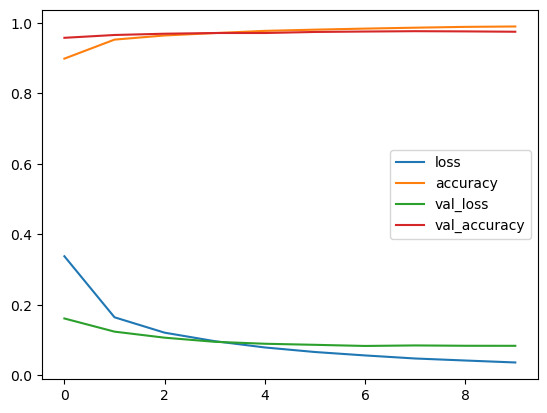

In [13]:
pd.DataFrame(history.history).plot()